In [1]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
# Read the CSV file
fuel_econ = pd.read_csv('fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [7]:
# Convert the "VClass" column from a plain object type into an ordered categorical type
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x:x.split()[0])

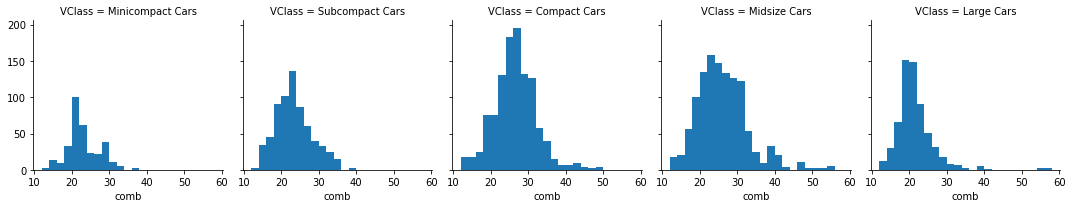

In [8]:
bins = np.arange(12, 58+2, 2)
g = sb.FacetGrid(data=fuel_econ, col='VClass')
g.map(plt.hist, 'comb', bins=bins);

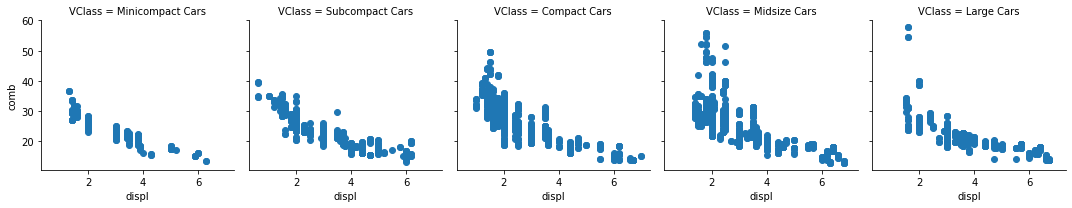

In [11]:
bins = np.arange(12, 58+2, 2)
g = sb.FacetGrid(data=fuel_econ, col='VClass')
g.map(plt.scatter, 'displ', 'comb');

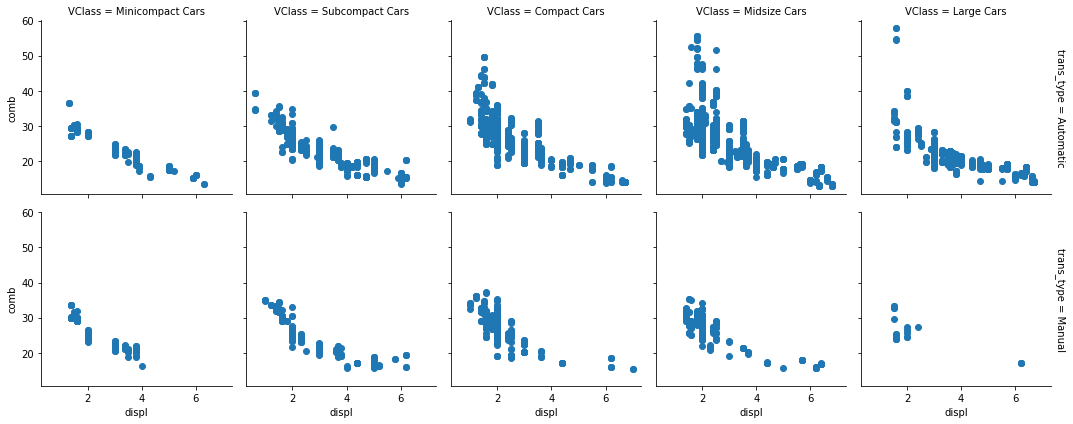

In [12]:
bins = np.arange(12, 58+2, 2)
g = sb.FacetGrid(data=fuel_econ, col='VClass', row='trans_type',
                margin_titles=True)
g.map(plt.scatter, 'displ', 'comb');

C:\Users\christopher.hu\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


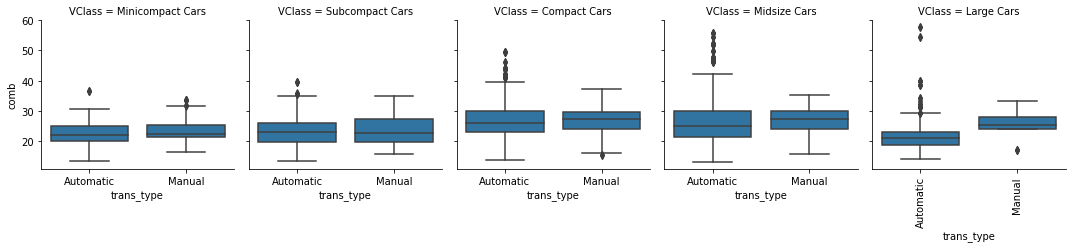

In [24]:
g = sb.FacetGrid(data=fuel_econ, col='VClass',
                margin_titles=True)
g.map(sb.boxplot, 'trans_type','comb');
plt.xticks(rotation = 90);


C:\Users\christopher.hu\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


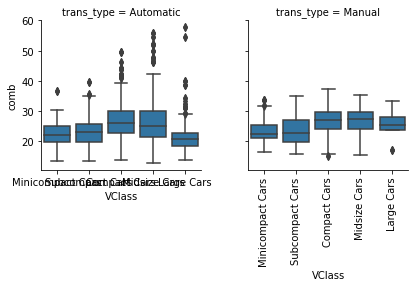

In [25]:
g = sb.FacetGrid(data=fuel_econ, col='trans_type')
g.map(sb.boxplot, 'VClass','comb');
plt.xticks(rotation = 90);